<a href="https://colab.research.google.com/github/rahmatullayli/pendata/blob/main/TUGAS_PRA_UAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Memilih dataset (terutama untuk tugas clustering) dari dua sumber:




*   UCI Machine Learning Repository -
Clustering Tasks

*   BigML blog - public datasets


2. Langkah-langkah Analisis:



*   Data understanding


*   Eksplorasi data (outlier, missing value, dll)


*   Visualisasi
*   Preprocessing (binning, normalisasi, reduksi dimensi, dll)

*   Clustering atau klasifikasi


*   Evaluasi model
*   Deploy model







# **📌 Bagian 1: Import dan Load Dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import joblib
import warnings
warnings.filterwarnings('ignore')

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv'
data = pd.read_csv(url)
data.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


# **📌 Bagian 2: Exploratory Data Analysis**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


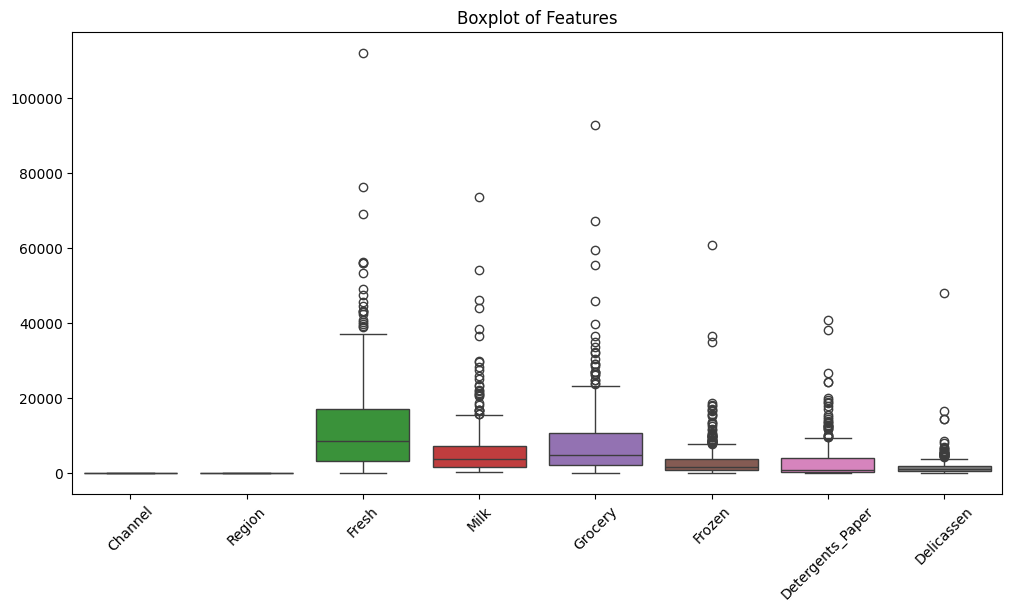

In [2]:
data.info()
data.describe()
data.isnull().sum()

plt.figure(figsize=(12,6))
sns.boxplot(data=data)
plt.title('Boxplot of Features')
plt.xticks(rotation=45)
plt.show()


# **📌 Bagian 3: Preprocessing (Normalisasi + PCA)**

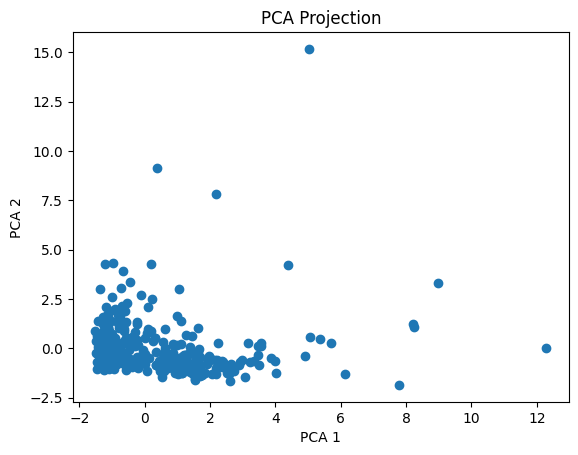

In [3]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.scatter(pca_data[:, 0], pca_data[:, 1])
plt.title('PCA Projection')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


# **📌 Bagian 4: Clustering dan Evaluasi**

In [4]:
sil_scores = []
for k in range(2, 7):
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(scaled_data)
    sil = silhouette_score(scaled_data, labels)
    sil_scores.append((k, sil))
    print(f'K={k}, Silhouette Score={sil:.4f}')


K=2, Silhouette Score=0.3742
K=3, Silhouette Score=0.3568
K=4, Silhouette Score=0.3482
K=5, Silhouette Score=0.3570
K=6, Silhouette Score=0.3559


# **📌 Bagian 5: Final Model dan Visualisasi**

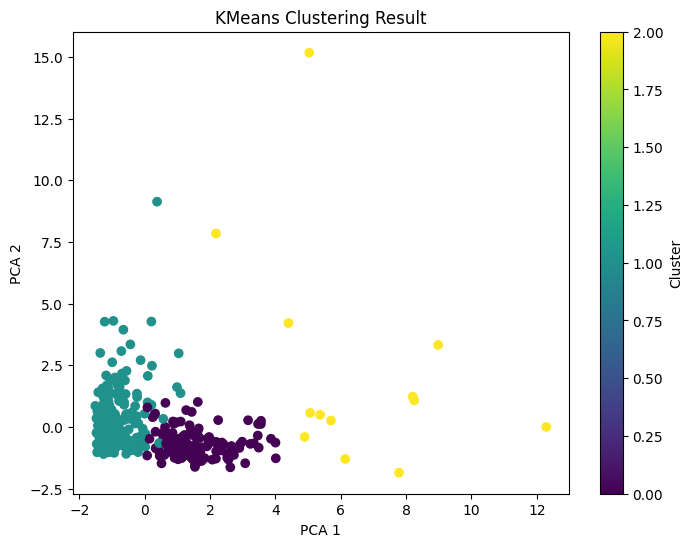

In [5]:
final_kmeans = KMeans(n_clusters=3, random_state=42)
labels = final_kmeans.fit_predict(scaled_data)

plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels, cmap='viridis')
plt.title('KMeans Clustering Result')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.show()


# **📌 Bagian 6: Save Model**

In [6]:
joblib.dump(final_kmeans, 'kmeans_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']